In [79]:
from __future__ import absolute_import, division, print_function

#@markdown This sets the warning status (default is `ignore`, since this notebook runs correctly)
warning_status = "ignore" #@param ["ignore", "always", "module", "once", "default", "error"]
import warnings
warnings.filterwarnings(warning_status)
with warnings.catch_warnings():
    warnings.filterwarnings(warning_status, category=DeprecationWarning)
    warnings.filterwarnings(warning_status, category=UserWarning)

import numpy as np
import os
#@markdown This sets the styles of the plotting (default is styled like plots from [FiveThirtyeight.com](https://fivethirtyeight.com/))
matplotlib_style = 'fivethirtyeight' #@param ['fivethirtyeight', 'bmh', 'ggplot', 'seaborn', 'default', 'Solarize_Light2', 'classic', 'dark_background', 'seaborn-colorblind', 'seaborn-notebook']
import matplotlib as mpl
import matplotlib.pyplot as plt; plt.style.use(matplotlib_style)
import matplotlib.axes as axes;
from matplotlib.patches import Ellipse
from mpl_toolkits.mplot3d import Axes3D
# import pandas_datareader.data as web
%matplotlib inline
import seaborn as sns; sns.set_context('notebook')
from IPython.core.pylabtools import figsize
#@markdown This sets the resolution of the plot outputs (`retina` is the highest resolution)
notebook_screen_res = 'retina' #@param ['retina', 'png', 'jpeg', 'svg', 'pdf']
%config InlineBackend.figure_format = notebook_screen_res

In [2]:
import pandas as pd
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Global variables
GREY_COLOUR = '#B4B4B3'
RED_COLOUR0 = '#F78CA2'
RED_COLOUR1 = '#E8466A'
RED_COLOUR2 = '#D80032'

# LOADING THE DATA

In [4]:
data = pd.read_csv("clean-ifood-data.csv")
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital,education,YearsAsCustomer
0,58138.0,0,0,58,635,88,546,172,88,88,...,11,1,63,2822,1529,1441,0,Single,Graduation,8
1,46344.0,1,1,38,11,1,6,2,1,6,...,11,0,66,2272,21,15,0,Single,Graduation,6
2,71613.0,0,0,26,426,49,127,111,21,42,...,11,0,55,2471,734,692,0,Together,Graduation,7
3,26646.0,1,0,26,11,4,20,10,3,5,...,11,0,36,2298,48,43,0,Together,Graduation,6
4,58293.0,1,0,94,173,43,118,46,27,15,...,11,0,39,2320,407,392,0,Married,PhD,6


In [5]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital', 'education', 'YearsAsCustomer'],
      dtype='object')

# PREVIOUS CAMPAIGN RESPONSES

In this section we're going to take a high-level glance of how our customers have been responding to our previous campaigns.

#### Questions to investigate
- [x] Do we have the same people responding positively, to campaigns, or we have new acceptor each times?
- [x] What's the correlation on responses between campaigns?
- [x] How did each customer repond to each campaign?

In [6]:
cmp_responses_counts = (data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
 .melt(var_name='Campaign Names', value_name='Responses')
 .value_counts()
 .reset_index()  # Reset the index to convert the result to a DataFrame
 .rename(columns={0: 'Response Counts'}))

In [7]:
cmp_responses_counts.head()

,Campaign Names,Responses,count
0,AcceptedCmp2,0,2175
1,AcceptedCmp1,0,2063
2,AcceptedCmp5,0,2044
3,AcceptedCmp3,0,2042
4,AcceptedCmp4,0,2041


In [8]:
cmp_responses_counts['Campaign Names'].unique()

array(['AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp5', 'AcceptedCmp3',
       'AcceptedCmp4', 'Response'], dtype=object)

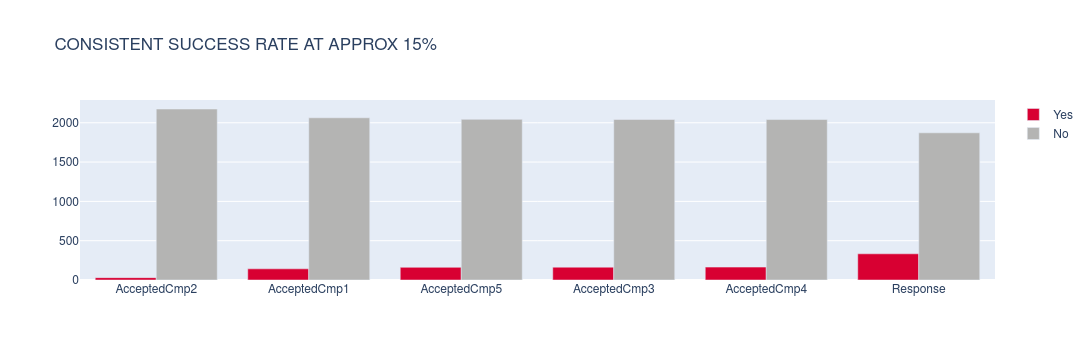

In [51]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=cmp_responses_counts['Campaign Names'],
    y=cmp_responses_counts['count'].where(cmp_responses_counts['Responses'] == 1),
    name='Yes',
    marker_color=RED_COLOUR2
))
fig.add_trace(go.Bar(
    x=cmp_responses_counts['Campaign Names'],
    y=cmp_responses_counts['count'].where(cmp_responses_counts['Responses'] == 0),
    name='No',
    marker_color=GREY_COLOUR,
    # marker_opacity=0.7
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', title_text='CONSISTENT SUCCESS RATE AT APPROX 15%')
fig.show()

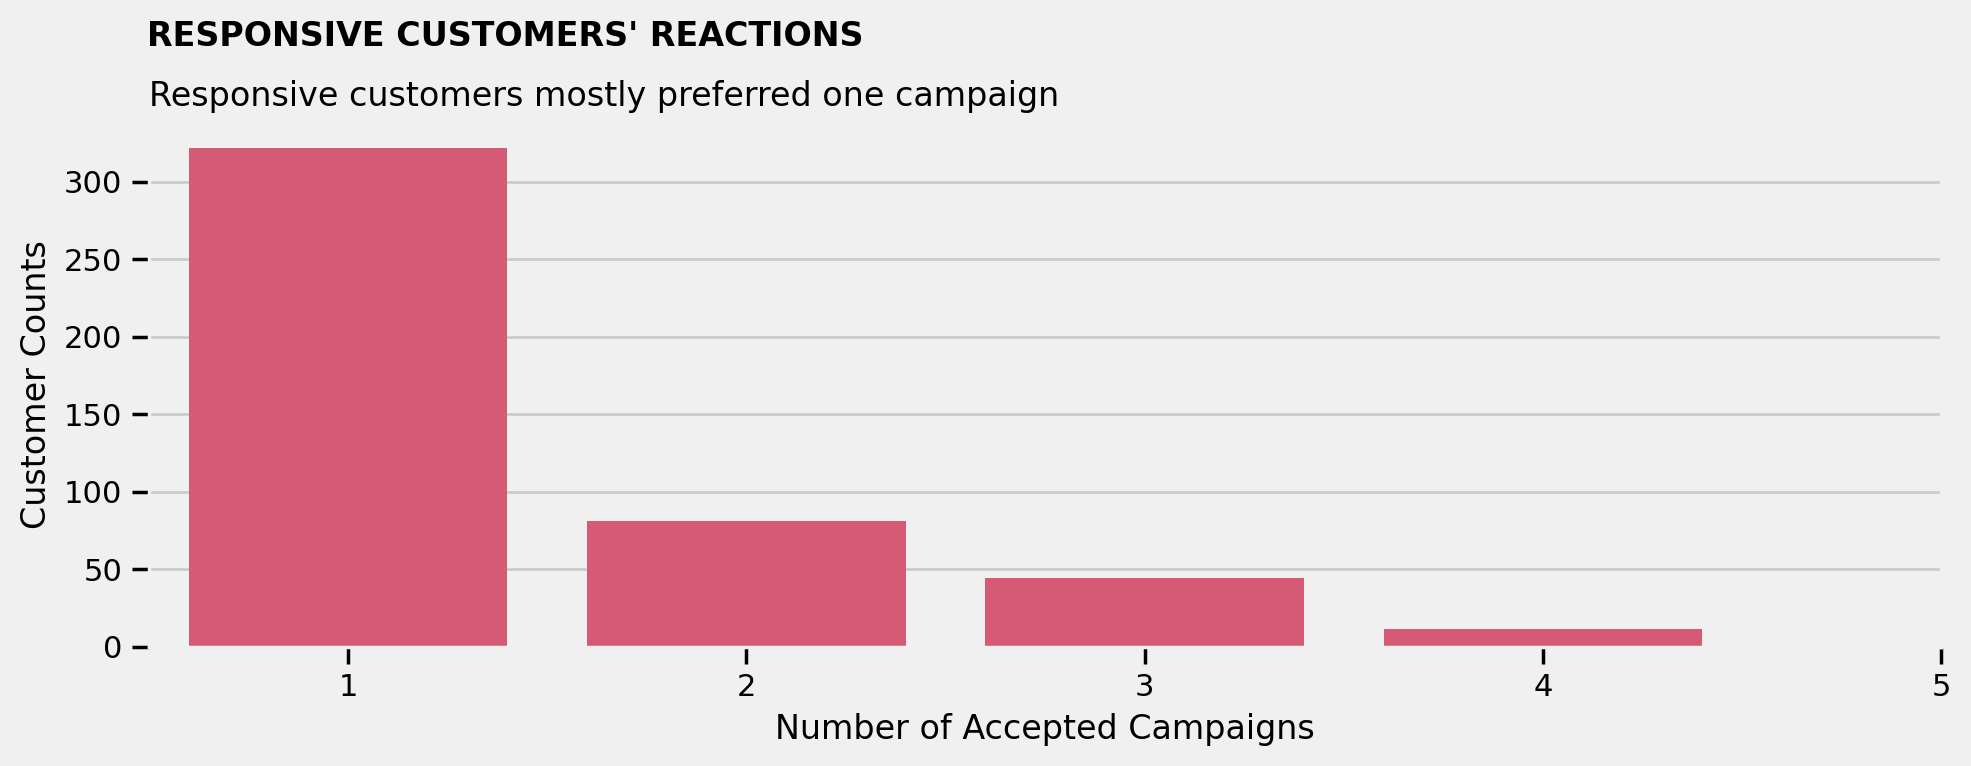

In [82]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data.where(data['AcceptedCmpOverall'] != 0), x='AcceptedCmpOverall', color=RED_COLOUR1)
plt.title('Responsive customers mostly preferred one campaign', loc='left')
plt.suptitle("RESPONSIVE CUSTOMERS' REACTIONS", ha='left', fontsize=12, fontweight='bold', x=0.08, y=0.95)
plt.xlabel('Number of Accepted Campaigns')
plt.ylabel('Customer Counts')
plt.xticks(ticks=range(0, len(data['AcceptedCmpOverall'].unique())),
           labels=range(1, len(data['AcceptedCmpOverall'].unique()) + 1))

# Show the plot
_ = plt.tight_layout()
# _ = plt.savefig('positive_responses.png')
_ = plt.show()

In [11]:
color_palette = sns.light_palette(RED_COLOUR2, as_cmap=True)

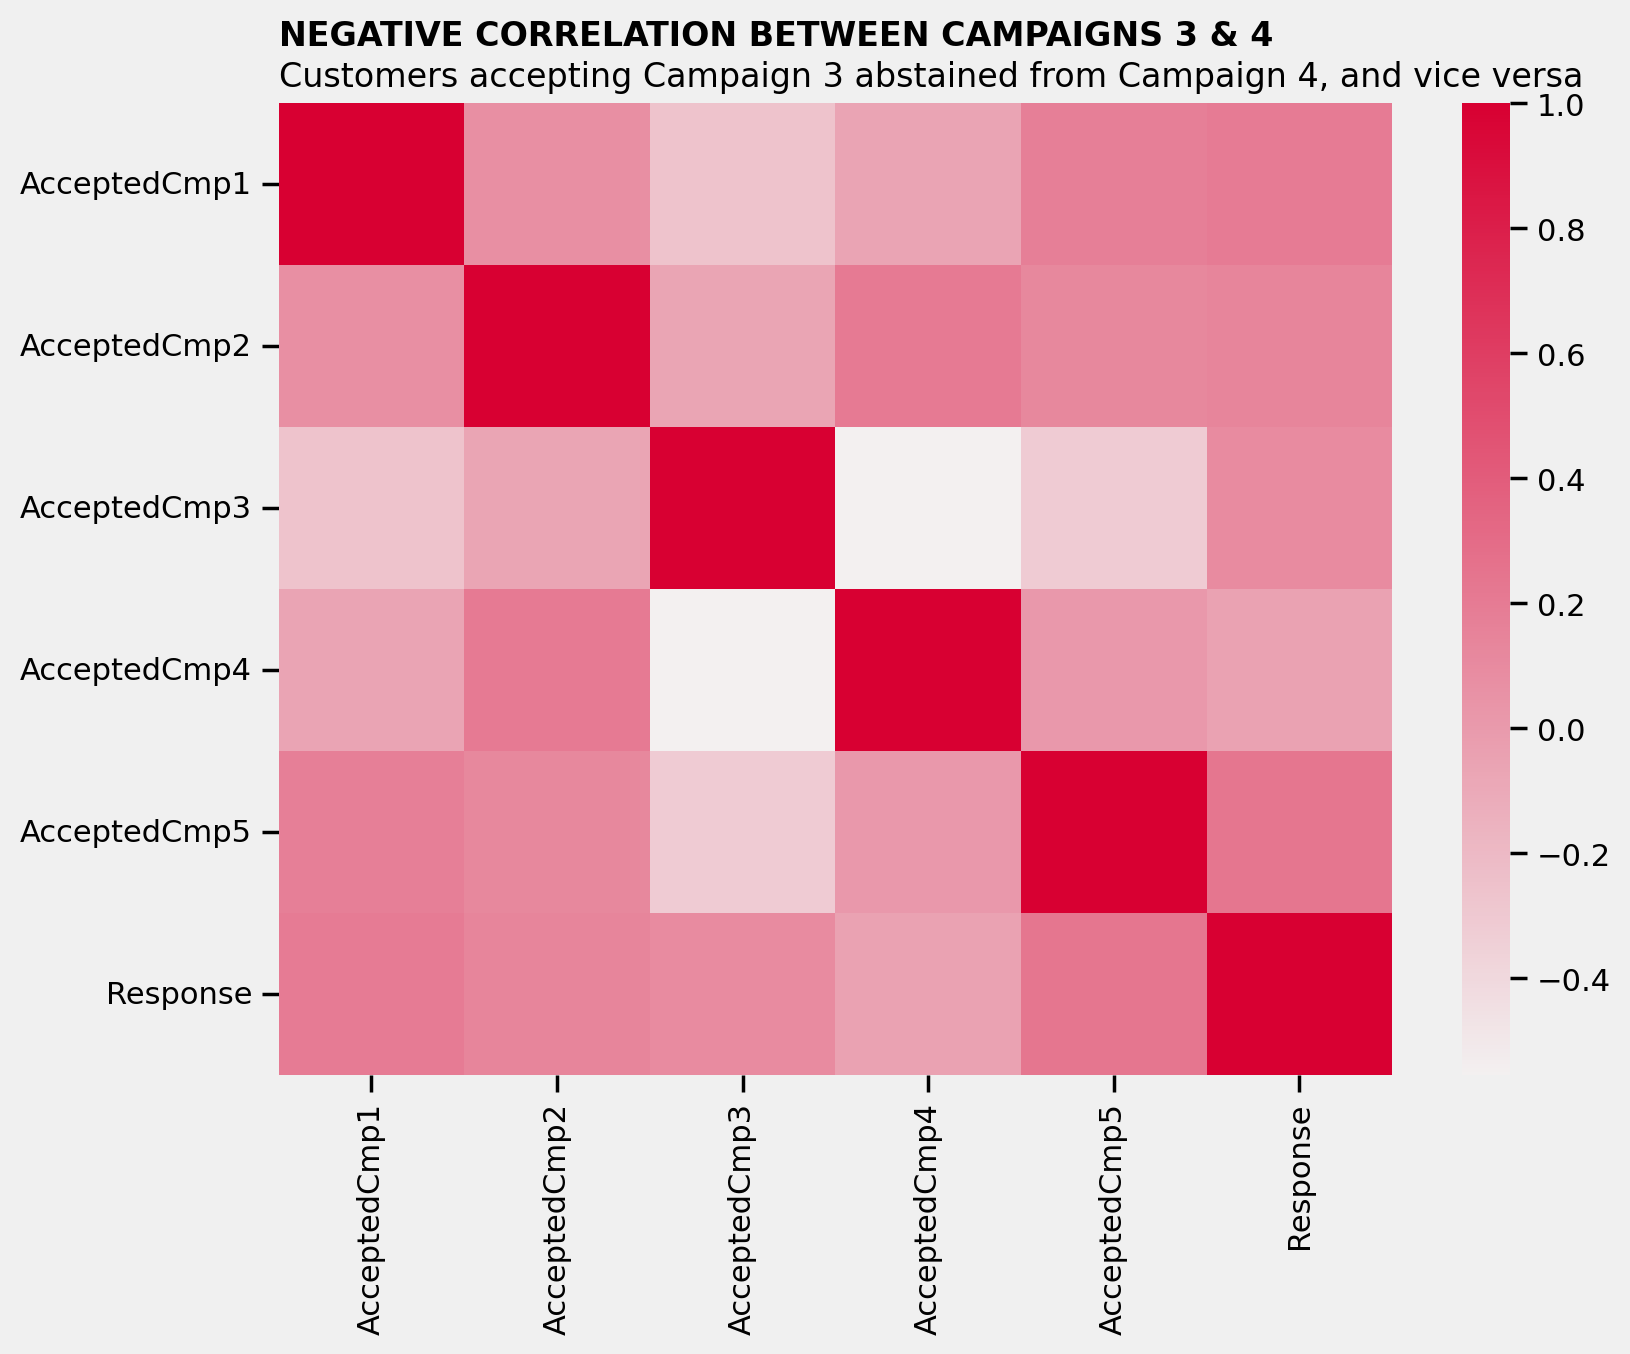

In [81]:
overall_responses = data[data['AcceptedCmpOverall'] != 0][['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]
correlation_matrix = overall_responses.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap=color_palette)
plt.title('Customers accepting Campaign 3 abstained from Campaign 4, and vice versa', loc='left')
plt.suptitle("NEGATIVE CORRELATION BETWEEN CAMPAIGNS 3 & 4", ha='left', fontsize=12, fontweight='bold', x=0.08, y=0.95)
# _ = plt.savefig('cmp_correlations.png')
plt.show()

In [13]:
overall_responses['AcceptedCombination'] = overall_responses.apply(lambda row: ''.join(map(str, row)), axis=1)

In [14]:
overall_responses.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,AcceptedCombination
9,0,0,1,0,0,0,001000
14,1,0,0,0,1,1,100011
17,1,0,0,0,0,0,100000
21,0,0,0,1,0,0,000100
27,0,0,0,0,1,0,000010


In [15]:
campaign_combination_counts = overall_responses['AcceptedCombination'].value_counts()

In [16]:
str_colours = (GREY_COLOUR * (len(campaign_combination_counts) - 3) + RED_COLOUR2 * 3)
colours_list = ['#' + color for color in str_colours.split('#') if color]

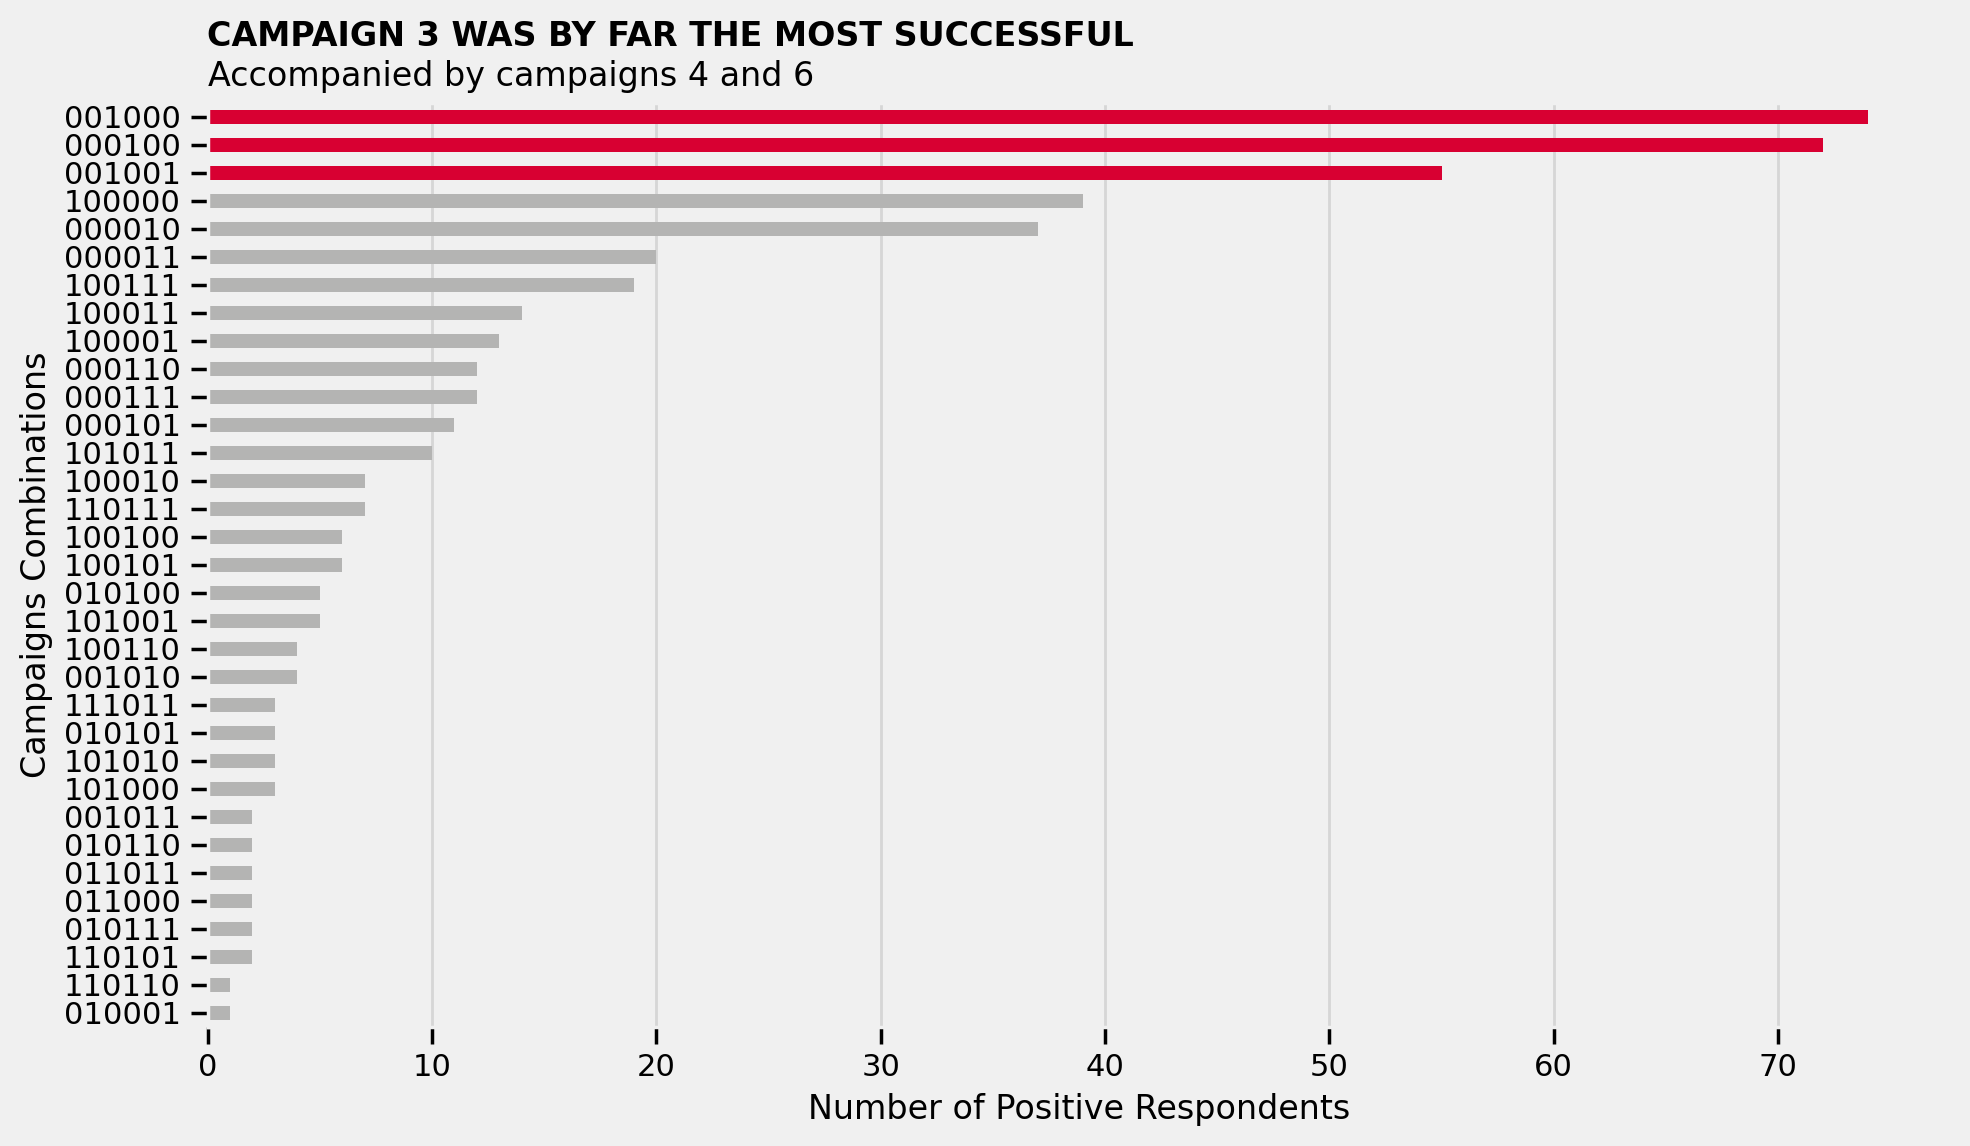

In [83]:
# Create a bar plot
plt.figure(figsize=(10, 6))
campaign_combination_counts.sort_values(ascending=True).plot(kind='barh', color=colours_list)
plt.xlabel('Number of Positive Respondents')
plt.ylabel('Campaigns Combinations')
plt.title('Accompanied by campaigns 4 and 6', loc='left')
plt.suptitle('CAMPAIGN 3 WAS BY FAR THE MOST SUCCESSFUL', ha='left', fontsize=12, fontweight='bold', x=0.11, y=0.95)
plt.tight_layout()
plt.grid(False)
plt.grid(axis='x', alpha=0.7) # looks like a bad practise, but does the job for now. will fix it later
# _ = plt.savefig('cmp_combos.png')
plt.show()

## Insights from Campaign Responses

- The results have been fairly consistent; all campaigns have been reporting success rates around 10-15%, with the highest success rate in the most-recent campaign. A little over a third of all customers that accepted any campaign went on to accept another campaign. This means the majority of wins typically come from customers that haven't accepted a campaign before.
- We also learn that, there's a meaningful negative correlation between 3 and 4, meaning, if a customer accepted campaign 3, they have a 56% probability of not accepting campaign 4. It's possible that the opposite is true, but it bears no meaning since we do not know the details of these campaigns e.g. the products that were campaigned for.
- There's no meaningful positive correlation, which makes sense since the majority of customer only accepted one campaign. However, this begs the question: why do we have a negative correlation between campaigns 3 and 4? *The important point here should be, **there's no positive correlation,** hence, it's a waste of resources applying to different campaigns to one customer(assuming the campaigns were similar)*
- Whatever was done in `Campaign 3` seems to have brought the numbers. The majority of the numbers came from combinations [3], [4] and [3, 6]. We then had combinations [1] and [5] adding to make a total contribution of roughtly 70%
    - I would've loved to explore why `Campaign 3` was so successful, but I'm currently having a hard time imagining how this can be done succinctly

**NB:** The correlation heatmap seems to be less effective in communicating the campaigns that each customer chose.

# PURCHASING PATTERNS

### Product Preferrences
It's hard to make in-depth analyses on product preferences because we don't know how often these products are bought and the amount spent each time. All we know is their total amount spent.

# Customer Analysis
The data does contain the 15% success rate mentioned in the project briefing. We're now going to explore any common characteristics that can distinguish between these two groups - those that responded positively to the last campaign and those that didn't. The natural approach is to just check for differences based on similar groups of variables as follows:
* Behavioural Buying Patterns
  - Segement by products bought
  - Segment by buying methods